In [228]:
import numpy as np
import pandas as pd

In [229]:
from sklearn.impute import SimpleImputer

In [230]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

In [231]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error, r2_score

In [232]:
from sklearn.model_selection import train_test_split

In [233]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [234]:
data = pd.read_csv('/content/StudentPerformanceFactors.csv')

In [235]:
df = pd.DataFrame(data)

In [236]:
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


In [237]:
df.isnull().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


In [238]:
a = df.isnull().sum() / df.shape[0] *100

In [239]:
a

,0
Hours_Studied,0.000000
Attendance,0.000000
Parental_Involvement,0.000000
Access_to_Resources,0.000000
Extracurricular_Activities,0.000000
Sleep_Hours,0.000000
Previous_Scores,0.000000
Motivation_Level,0.000000
Internet_Access,0.000000
Tutoring_Sessions,0.000000


In [240]:
toDel = a[a>17].keys()

In [241]:
toDel

Index([], dtype='object')

In [242]:
cat_col = df.select_dtypes(include = ['object']).columns.tolist()

In [243]:
cat_col

['Parental_Involvement',
 'Access_to_Resources',
 'Extracurricular_Activities',
 'Motivation_Level',
 'Internet_Access',
 'Family_Income',
 'Teacher_Quality',
 'School_Type',
 'Peer_Influence',
 'Learning_Disabilities',
 'Parental_Education_Level',
 'Distance_from_Home',
 'Gender']

In [244]:
num_col = df.select_dtypes(include = ['int64' , 'float64']).columns.tolist()

In [245]:
num_col

['Hours_Studied',
 'Attendance',
 'Sleep_Hours',
 'Previous_Scores',
 'Tutoring_Sessions',
 'Physical_Activity',
 'Exam_Score']

In [246]:
cat_clean = SimpleImputer(strategy = 'most_frequent')
num_clean = SimpleImputer(strategy = 'mean')

In [247]:
df[cat_col] = cat_clean.fit_transform(df[cat_col])

In [248]:
df[num_col] = num_clean.fit_transform(df[num_col])

In [249]:
df.isnull().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


In [250]:
print(x.columns)

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity'],
      dtype='object')


In [251]:
x=df.drop(columns=['Exam_Score'])

In [252]:
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23.0,84.0,Low,High,No,7.0,73.0,Low,Yes,0.0,Low,Medium,Public,Positive,3.0,No,High School,Near,Male,67.0
1,19.0,64.0,Low,Medium,No,8.0,59.0,Low,Yes,2.0,Medium,Medium,Public,Negative,4.0,No,College,Moderate,Female,61.0
2,24.0,98.0,Medium,Medium,Yes,7.0,91.0,Medium,Yes,2.0,Medium,Medium,Public,Neutral,4.0,No,Postgraduate,Near,Male,74.0
3,29.0,89.0,Low,Medium,Yes,8.0,98.0,Medium,Yes,1.0,Medium,Medium,Public,Negative,4.0,No,High School,Moderate,Male,71.0
4,19.0,92.0,Medium,Medium,Yes,6.0,65.0,Medium,Yes,3.0,Medium,High,Public,Neutral,4.0,No,College,Near,Female,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25.0,69.0,High,Medium,No,7.0,76.0,Medium,Yes,1.0,High,Medium,Public,Positive,2.0,No,High School,Near,Female,68.0
6603,23.0,76.0,High,Medium,No,8.0,81.0,Medium,Yes,3.0,Low,High,Public,Positive,2.0,No,High School,Near,Female,69.0
6604,20.0,90.0,Medium,Low,Yes,6.0,65.0,Low,Yes,3.0,Low,Medium,Public,Negative,2.0,No,Postgraduate,Near,Female,68.0
6605,10.0,86.0,High,High,Yes,6.0,91.0,High,Yes,2.0,Low,Medium,Private,Positive,3.0,No,High School,Far,Female,68.0


In [253]:
df["Parental_Involvement"] = df["Parental_Involvement"].map({
    "Low": 0,
    "Medium": 1,
    "High": 2
})

In [254]:
df["Access_to_Resources"] = df["Access_to_Resources"].map({
    "Low": 0,
    "Medium": 1,
    "High": 2
})

In [255]:
df["Extracurricular_Activities"] = df["Extracurricular_Activities"].map({
    'No': 0,
    'Yes': 1
})

In [256]:
df["Motivation_Level"] = df["Motivation_Level"].map({
    "Low": 0,
    "Medium": 1,
    "High": 2
})

In [257]:
df["Family_Income"] = df["Family_Income"].map({
    "Low": 0,
    "Medium": 1,
    "High": 2
})

In [258]:
df["Teacher_Quality"] = df["Teacher_Quality"].map({
    "Low": 0,
    "Medium": 1,
    "High": 2
})

In [259]:
df["School_Type"] = df["School_Type"].map({
    'Public': 0,
    'Private': 1
})

In [260]:
df["Peer_Influence"] = df["Peer_Influence"].map({
    "Negative": 0,
    "Neutral": 1,
    "Positive": 2
})

In [261]:
df["Learning_Disabilities"] = df["Learning_Disabilities"].map({
    'No': 0,
    'Yes': 1
})

In [262]:
df["Parental_Education_Level"] = df["Parental_Education_Level"].map({
    "High School": 0,
    "College": 1,
    "Postgraduate": 2
})

In [263]:
df["Distance_from_Home"] = df["Distance_from_Home"].map({
    "Far": 0,
    "Moderate": 1,
    "Near": 2
})

In [264]:
df["Gender"] = df["Gender"].map({
    'Male': 0,
    'Female': 1
})

In [265]:
df["Internet_Access"] = df["Internet_Access"].map({
    'No': 0,
    'Yes': 1
})

In [266]:
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23.0,84.0,0,2,0,7.0,73.0,0,1,0.0,0,1,0,2,3.0,0,0,2,0,67.0
1,19.0,64.0,0,1,0,8.0,59.0,0,1,2.0,1,1,0,0,4.0,0,1,1,1,61.0
2,24.0,98.0,1,1,1,7.0,91.0,1,1,2.0,1,1,0,1,4.0,0,2,2,0,74.0
3,29.0,89.0,0,1,1,8.0,98.0,1,1,1.0,1,1,0,0,4.0,0,0,1,0,71.0
4,19.0,92.0,1,1,1,6.0,65.0,1,1,3.0,1,2,0,1,4.0,0,1,2,1,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25.0,69.0,2,1,0,7.0,76.0,1,1,1.0,2,1,0,2,2.0,0,0,2,1,68.0
6603,23.0,76.0,2,1,0,8.0,81.0,1,1,3.0,0,2,0,2,2.0,0,0,2,1,69.0
6604,20.0,90.0,1,0,1,6.0,65.0,0,1,3.0,0,1,0,0,2.0,0,2,2,1,68.0
6605,10.0,86.0,2,2,1,6.0,91.0,2,1,2.0,0,1,1,2,3.0,0,0,0,1,68.0


In [267]:
df.dtypes

,0
Hours_Studied,float64
Attendance,float64
Parental_Involvement,int64
Access_to_Resources,int64
Extracurricular_Activities,int64
Sleep_Hours,float64
Previous_Scores,float64
Motivation_Level,int64
Internet_Access,int64
Tutoring_Sessions,float64


In [268]:
df.corr()["Exam_Score"].sort_values(ascending=False)

,Exam_Score
Exam_Score,1.000000
Attendance,0.581072
Hours_Studied,0.445455
Previous_Scores,0.175079
Access_to_Resources,0.169770
Parental_Involvement,0.157114
Tutoring_Sessions,0.156525
Parental_Education_Level,0.103817
Peer_Influence,0.100217
Family_Income,0.094555


In [269]:
x = df.drop(columns = 'Exam_Score')

In [270]:
x

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender
0,23.0,84.0,0,2,0,7.0,73.0,0,1,0.0,0,1,0,2,3.0,0,0,2,0
1,19.0,64.0,0,1,0,8.0,59.0,0,1,2.0,1,1,0,0,4.0,0,1,1,1
2,24.0,98.0,1,1,1,7.0,91.0,1,1,2.0,1,1,0,1,4.0,0,2,2,0
3,29.0,89.0,0,1,1,8.0,98.0,1,1,1.0,1,1,0,0,4.0,0,0,1,0
4,19.0,92.0,1,1,1,6.0,65.0,1,1,3.0,1,2,0,1,4.0,0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25.0,69.0,2,1,0,7.0,76.0,1,1,1.0,2,1,0,2,2.0,0,0,2,1
6603,23.0,76.0,2,1,0,8.0,81.0,1,1,3.0,0,2,0,2,2.0,0,0,2,1
6604,20.0,90.0,1,0,1,6.0,65.0,0,1,3.0,0,1,0,0,2.0,0,2,2,1
6605,10.0,86.0,2,2,1,6.0,91.0,2,1,2.0,0,1,1,2,3.0,0,0,0,1


In [271]:
y = df['Exam_Score']

In [272]:
y

,Exam_Score
0,67.0
1,61.0
2,74.0
3,71.0
4,70.0
...,...
6602,68.0
6603,69.0
6604,68.0
6605,68.0


In [273]:
x_train , x_test , y_train , y_test = train_test_split(x, y, test_size=0.2 , random_state = 51)

In [274]:
x_train.shape

(5285, 19)

In [275]:
x_test.shape

(1322, 19)

In [276]:
x_test_sc = std.fit_transform(x_test)

In [277]:
x_test_sc

array([[-0.35349262,  0.97298311,  1.29676639, ..., -0.88871662,
         0.73264499, -0.8936663 ],
       [ 0.48700602,  0.97298311, -0.11886133, ..., -0.88871662,
         0.73264499,  1.11898591],
       [-2.0344899 , -1.14435627, -0.11886133, ...,  0.39671376,
         0.73264499, -0.8936663 ],
       ...,
       [ 1.66370411,  0.35542579, -1.53448905, ...,  0.39671376,
         0.73264499, -0.8936663 ],
       [ 0.15080656, -1.49724617, -1.53448905, ..., -0.88871662,
         0.73264499, -0.8936663 ],
       [ 0.15080656, -1.49724617, -0.11886133, ..., -0.88871662,
         0.73264499,  1.11898591]])

In [278]:
models = {
    'lr' :LinearRegression(),
    'r' : Ridge(),
    'l' : Lasso(),
    'svr1' : SVR(kernel = 'rbf'),
    'svr2' : SVR(kernel = 'linear'),
    'tree1' : DecisionTreeRegressor(random_state = 51),
    'tree2' : DecisionTreeRegressor(random_state = 21),
    'rf1' : RandomForestRegressor(n_estimators=200 , random_state=51),
    'rf2' : RandomForestRegressor(n_estimators=100 , random_state=20),
    'knn1' : KNeighborsRegressor(n_neighbors=3)
}
r = {}

In [279]:
for name , model in models.items():
  pipeline = Pipeline([
      ('sc' , StandardScaler()),
      ('model' , model)
  ])
  pipeline.fit(x_train, y_train)
  score = pipeline.score(x_test,y_test)
  y_pred = pipeline.predict(x_test)
  y_pred=np.clip(y_pred,0,100)
  mse = mean_squared_error(y_test,y_pred)
  rmse = root_mean_squared_error(y_test, y_pred)
  r2 = r2_score(y_test,y_pred)

  r[name]={
      'name' : pipeline,
      'mse' : mse,
      'rmse' : rmse,
      'r2' :r2
  }
  print(name)
  print(mse)
  print(rmse)
  print(r2)

lr
3.486121732041137
1.8671158860770096
0.7508474398726681
r
3.4860771874337444
1.8671039573183237
0.7508506234686022
l
8.177224231279137
2.8595846256544215
0.4155750978995335
svr1
3.717287455381129
1.928026829528347
0.7343260627634061
svr2
3.5041862778907436
1.8719471888626409
0.7495563696829499
tree1
10.369137670196672
3.220114543024312
0.258919396561172
tree2
11.152798789712557
3.339580630814677
0.20291126224817035
rf1
4.873611346444781
2.2076257260787617
0.6516837800378907
rf2
4.900990544629349
2.2138180920367754
0.6497269931422349
knn1
8.229786518742646
2.868760449870753
0.4118184796588922


In [280]:
best_pipeline_name = max(results, key = lambda x : results[x]['r2'])
best_model = results[best_pipeline_name]['model']
best_model

Pipeline(steps=[('scaler', StandardScaler()), ('model', Ridge())])

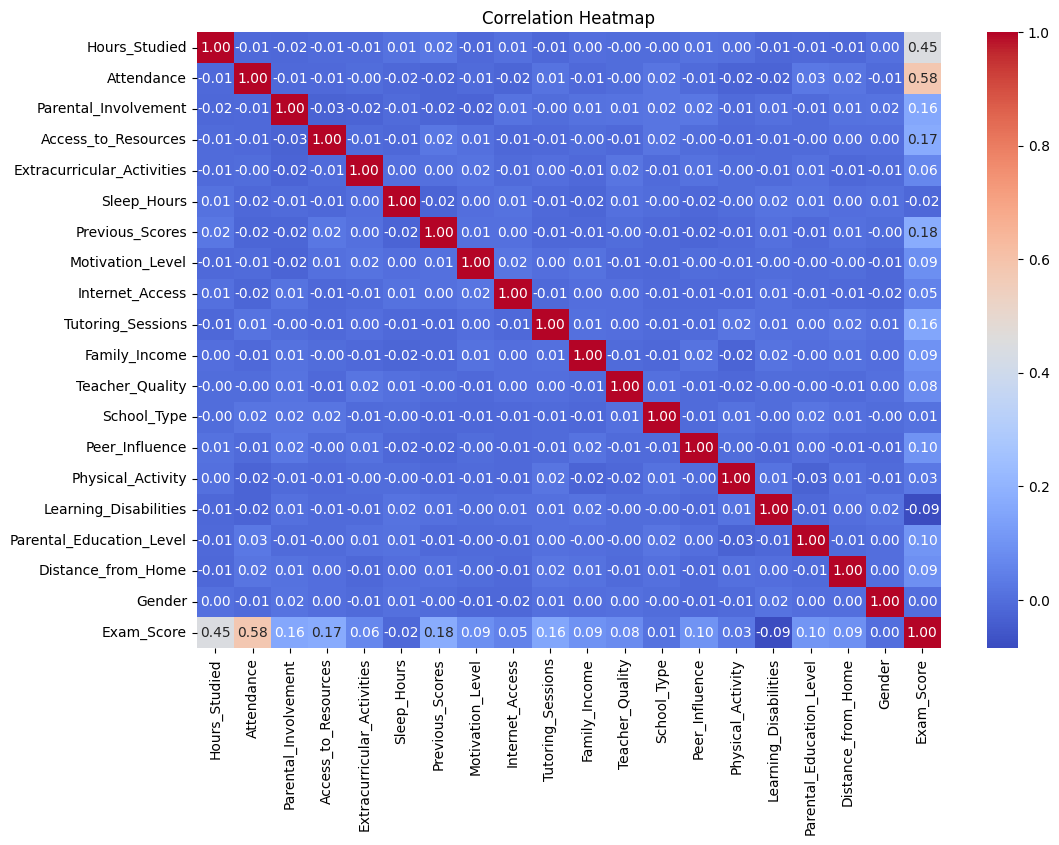

In [281]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


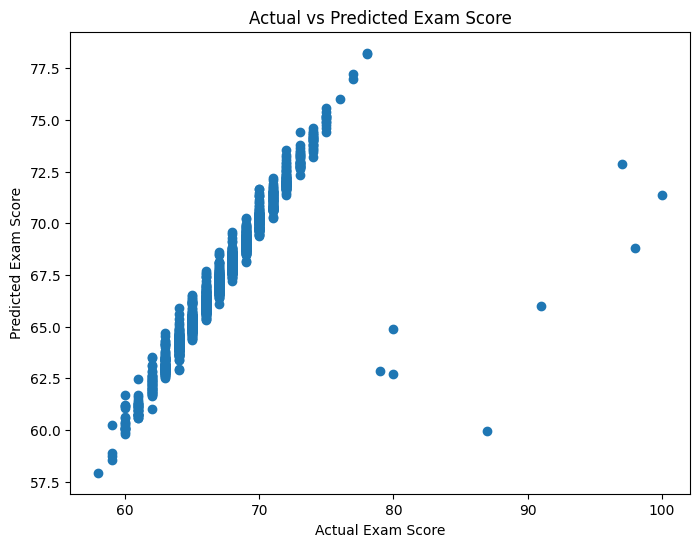

In [282]:
scaler_features = best_model.named_steps['scaler'].feature_names_in_
x_test_aligned = x_test[scaler_features]
y_pred_best = best_model.predict(x_test_aligned)

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_best)
plt.xlabel("Actual Exam Score")
plt.ylabel("Predicted Exam Score")
plt.title("Actual vs Predicted Exam Score")
plt.show()

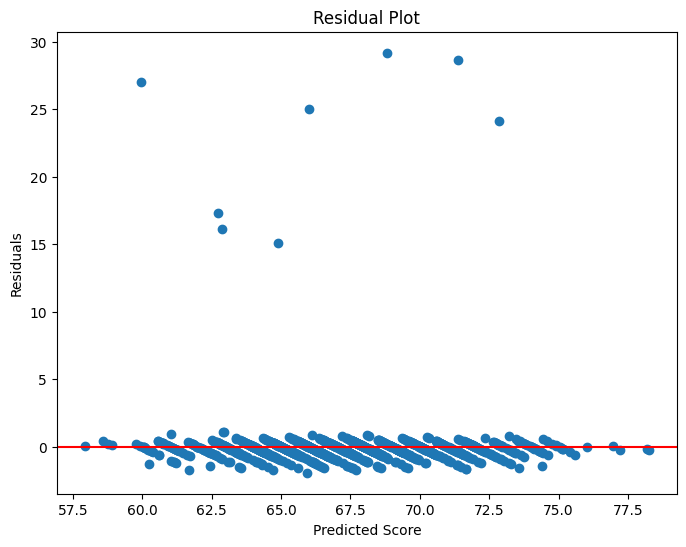

In [283]:
residuals = y_test - y_pred_best

plt.figure(figsize=(8,6))
plt.scatter(y_pred_best, residuals)
plt.axhline(y=0, color='r')
plt.xlabel("Predicted Score")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


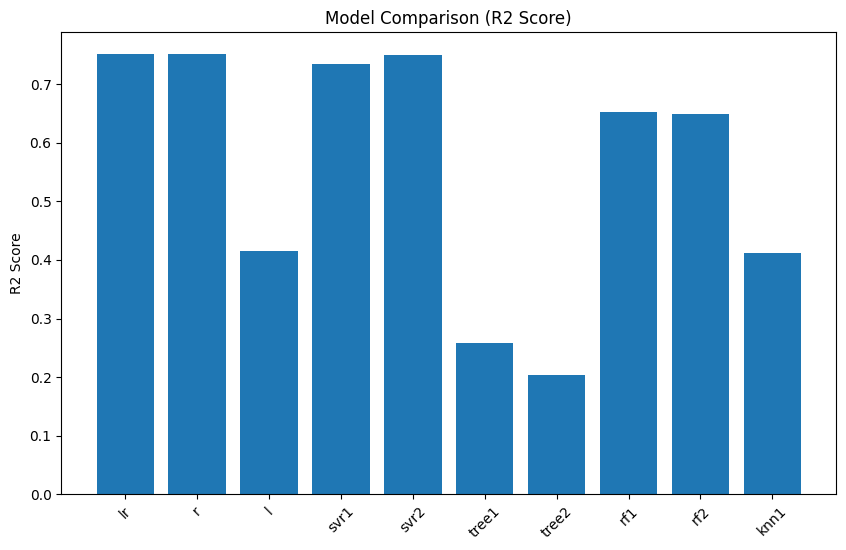

In [284]:
model_names = []
r2_scores = []

for name in r:
    model_names.append(name)
    r2_scores.append(r[name]['r2'])

plt.figure(figsize=(10,6))
plt.bar(model_names, r2_scores)
plt.xticks(rotation=45)
plt.ylabel("R2 Score")
plt.title("Model Comparison (R2 Score)")
plt.show()


In [285]:
if "rf" in best_pipeline_name:
    importances = best_model.named_steps['model'].feature_importances_
    features = x.columns

    plt.figure(figsize=(10,6))
    plt.barh(features, importances)
    plt.xlabel("Importance")
    plt.title("Feature Importance")
    plt.show()

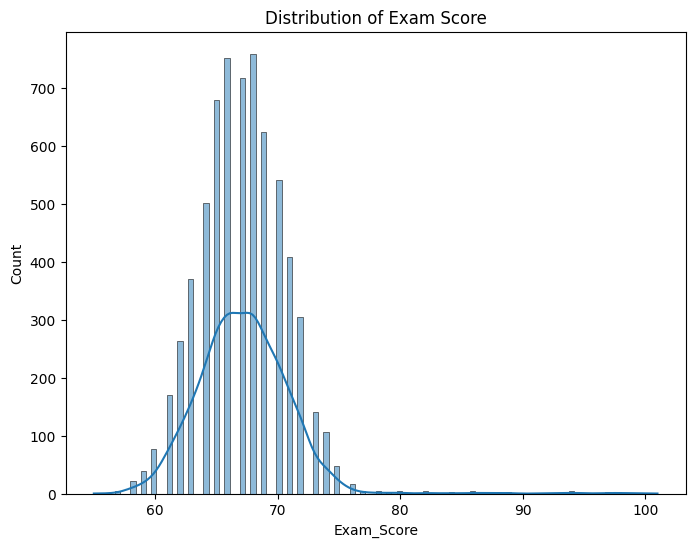

In [286]:
plt.figure(figsize=(8,6))
sns.histplot(df['Exam_Score'], kde=True)
plt.title("Distribution of Exam Score")
plt.show()


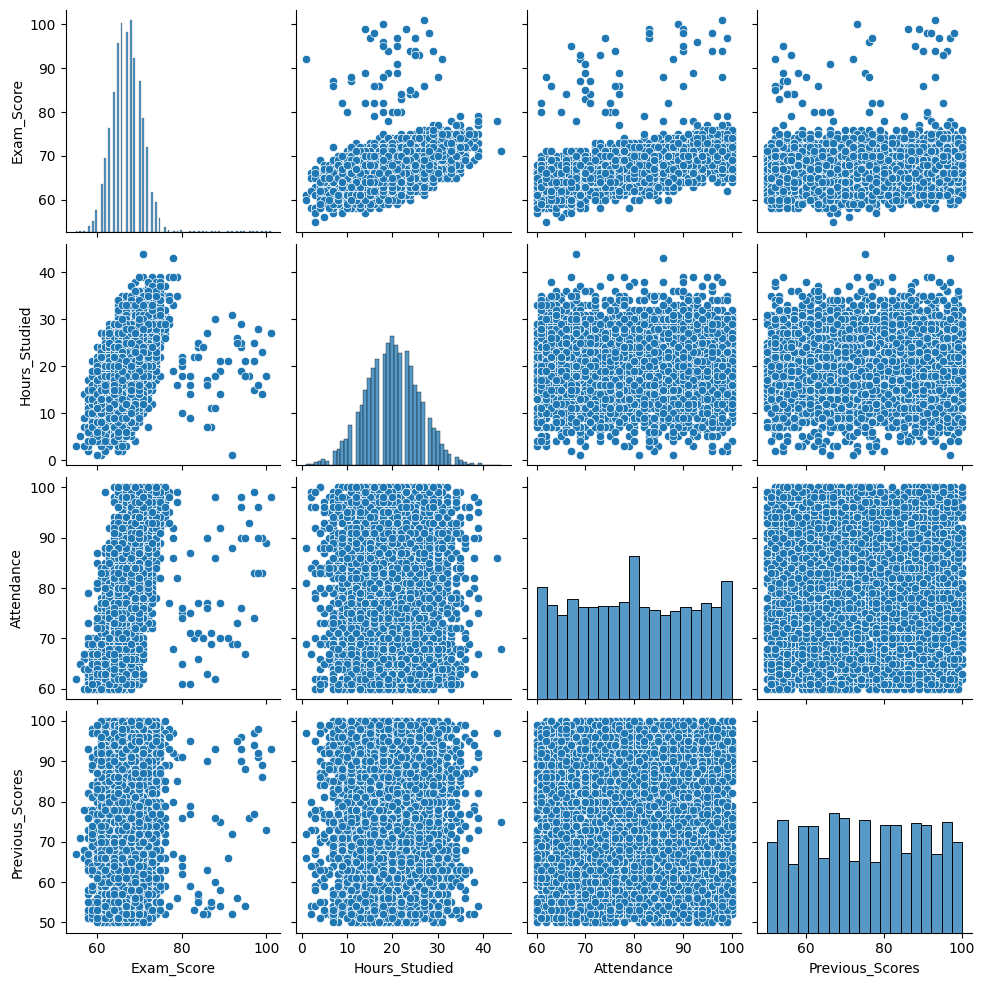

In [287]:
sns.pairplot(df[['Exam_Score','Hours_Studied','Attendance','Previous_Scores']])
plt.show()


In [288]:
import joblib
joblib.dump(r[best_pipeline_name]['name'], 'best_student_model.pkl')

['best_student_model.pkl']

In [289]:
print("Min Score:", df["Exam_Score"].min())
print("Max Score:", df["Exam_Score"].max())

Min Score: 55.0
Max Score: 101.0


In [290]:
df['Exam_Score'].describe()

,Exam_Score
count,6607.000000
mean,67.235659
std,3.890456
min,55.000000
25%,65.000000
50%,67.000000
75%,69.000000
max,101.000000


In [291]:
print(x.columns)

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender'],
      dtype='object')


In [292]:
joblib.dump(x.columns.tolist(), 'columns.pkl')

['columns.pkl']